In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
import gmaps
import os
%matplotlib inline
#files to load
data_1 = "Resources/California_School_District_Areas_2019-20.csv"
data_2 = "Resources/California_School_District_Areas_2020-21.csv"

# Read Files and store into Pandas data frame
school_2020_df = pd.read_csv(data_1)
school_2021_df = pd.read_csv(data_2)

In [2]:
#check data frame data_1
school_2020_df.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,FRPMcount,FRPMpct,SHAPE_Length,SHAPE_Area
0,1,2019-20,601770,161119,1611190000000,Alameda,Alameda Unified,Unified,PK,12,...,0,0.0,1303,11.5,3421,30.299999,3317,29.400000,56522.982848,-4.755489e+07
1,2,2019-20,601860,161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,...,0,0.0,317,8.8,658,18.299999,635,17.700001,12696.382778,-7.096327e+06
2,3,2019-20,604740,161143,1611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,0,0.0,1097,11.1,2789,28.299999,2673,27.200001,43695.341232,-4.364648e+07
3,4,2019-20,607800,161150,1611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,0,0.0,821,8.8,2121,22.799999,2036,21.799999,142492.767571,-2.838285e+08
4,5,2019-20,612630,161168,1611680000000,Alameda,Emery Unified,Unified,PK,12,...,0,0.0,73,10.1,521,72.300003,507,70.300003,13741.273106,-5.363392e+06


In [3]:
#check data frame data_2
school_2021_df.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,FRPMcount,FRPMpct,DistrctAreaSqMi,Shape__Area,Shape__Length
0,1,2020-21,601770,161119,1611190000000,Alameda,Alameda Unified,Unified,PK,12,...,0.0,1275,11.7,3202,29.3,3101,28.4,11.455570,4.755489e+07,56522.982683
1,2,2020-21,601860,161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,...,0.0,311,8.9,608,17.4,587,16.8,1.703654,7.096327e+06,12696.382797
2,3,2020-21,604740,161143,1611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,0.0,1091,11.6,2563,27.2,2431,25.8,10.483362,4.364648e+07,43695.341538
3,4,2020-21,607800,161150,1611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,0.0,850,9.2,2067,22.5,1977,21.5,68.442604,2.838285e+08,142492.767565
4,5,2020-21,612630,161168,1611680000000,Alameda,Emery Unified,Unified,PK,12,...,0.0,69,9.9,561,80.4,555,79.5,1.289416,5.363392e+06,13741.272894


In [4]:
#eliminating columns data_1
#check the columns
# school_2020_df.columns

reduced_school_2020_df = school_2020_df[["Year", "CountyName",
       "EnrollTotal", "EnrollCharter", "EnrollNonCharter", "AAcount",
       "AIcount","AScount", "FIcount", "HIcount",
       "PIcount", "WHcount", "MRcount", "NRcount", "ELcount", "FOScount",
       "HOMcount", "MIGcount", "SWDcount",
       "SEDcount"]]


reduced_school_2020_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AIcount,AScount,FIcount,HIcount,PIcount,WHcount,MRcount,NRcount,ELcount,FOScount,HOMcount,MIGcount,SWDcount,SEDcount
0,2019-20,Alameda,11285,1913,9372,795,34,2911,630,1992,63,3210,1400,250,1455,17,79,0,1303,3421
1,2019-20,Alameda,3586,0,3586,106,5,1042,38,580,4,1067,487,257,507,1,5,0,317,658
2,2019-20,Alameda,9844,0,9844,1282,14,712,84,2188,12,4054,1487,11,813,21,221,0,1097,2789
3,2019-20,Alameda,9321,0,9321,472,18,2646,416,2215,38,2389,916,211,1067,13,93,0,821,2121
4,2019-20,Alameda,721,0,721,317,2,76,7,181,8,66,64,0,155,0,12,0,73,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2019-20,Yuba,524,474,50,9,10,6,0,107,4,340,39,9,11,5,1,0,81,249
939,2019-20,Yuba,10157,571,9586,383,236,876,54,4445,43,3619,392,109,2102,114,185,23,1249,8103
940,2019-20,Yuba,1359,0,1359,44,3,77,15,393,6,669,144,8,74,8,0,0,134,505
941,2019-20,Yuba,1393,93,1300,53,7,20,19,372,11,749,160,2,80,7,26,2,146,652


In [5]:
##eliminating columns data_2
reduced_school_2021_df = school_2021_df[["Year", "CountyName",
       "EnrollTotal", "EnrollCharter", "EnrollNonCharter", "AAcount",
       "AIcount","AScount", "FIcount", "HIcount",
       "PIcount", "WHcount",  "MRcount", "NRcount","ELcount", "FOScount",
       "HOMcount", "MIGcount", "SWDcount",
       "SEDcount"]]
reduced_school_2021_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AIcount,AScount,FIcount,HIcount,PIcount,WHcount,MRcount,NRcount,ELcount,FOScount,HOMcount,MIGcount,SWDcount,SEDcount
0,2020-21,Alameda,10927,1856,9071,715,29,2768,605,1989,61,3021,1437,302,1316,16,77,0,1275,3202
1,2020-21,Alameda,3501,0,3501,118,7,1010,39,577,3,1007,489,251,400,2,3,0,311,608
2,2020-21,Alameda,9409,0,9409,1193,26,781,79,2084,13,3889,1331,13,635,16,199,0,1091,2563
3,2020-21,Alameda,9203,0,9203,451,10,2711,425,2150,36,2237,924,259,996,17,92,0,850,2067
4,2020-21,Alameda,698,0,698,315,2,77,6,169,8,60,56,5,140,0,1,0,69,561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2020-21,Yuba,572,522,50,15,10,9,0,105,0,367,57,9,8,3,7,0,88,252
938,2020-21,Yuba,9930,570,9360,368,183,870,54,4484,33,3379,458,101,2051,77,76,27,1307,7278
939,2020-21,Yuba,1348,0,1348,47,5,75,19,399,6,650,142,5,63,6,1,1,142,485
940,2020-21,Yuba,1278,92,1186,40,6,18,17,352,11,660,161,13,71,3,42,2,142,535


In [6]:
#rename columns to make it easier to read-2020 data
county_2020_df = reduced_school_2020_df.rename(columns={"AAcount":"African American",
       "AIcount": "American Indian","AScount":"Asian", "FIcount":"Filipino", "HIcount": "Hispanic",
       "PIcount": "Pacific Islander", "WHcount": "White", "MRcount": "Two or More Races", "NRcount": "Not Reported Races", "ELcount": "English Learner", "FOScount": "Foster Care",
       "HOMcount": "Homeless", "MIGcount": "Migrant", "SWDcount": "Students with Disabilities",
       "SEDcount": "Socioeconomically Disadvantaged"})
county_2020_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,Two or More Races,Not Reported Races,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
0,2019-20,Alameda,11285,1913,9372,795,34,2911,630,1992,63,3210,1400,250,1455,17,79,0,1303,3421
1,2019-20,Alameda,3586,0,3586,106,5,1042,38,580,4,1067,487,257,507,1,5,0,317,658
2,2019-20,Alameda,9844,0,9844,1282,14,712,84,2188,12,4054,1487,11,813,21,221,0,1097,2789
3,2019-20,Alameda,9321,0,9321,472,18,2646,416,2215,38,2389,916,211,1067,13,93,0,821,2121
4,2019-20,Alameda,721,0,721,317,2,76,7,181,8,66,64,0,155,0,12,0,73,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2019-20,Yuba,524,474,50,9,10,6,0,107,4,340,39,9,11,5,1,0,81,249
939,2019-20,Yuba,10157,571,9586,383,236,876,54,4445,43,3619,392,109,2102,114,185,23,1249,8103
940,2019-20,Yuba,1359,0,1359,44,3,77,15,393,6,669,144,8,74,8,0,0,134,505
941,2019-20,Yuba,1393,93,1300,53,7,20,19,372,11,749,160,2,80,7,26,2,146,652


In [7]:
#rename columns to make it easier to read-2021 data
county_2021_df = reduced_school_2021_df.rename(columns={"AAcount":"African American",
       "AIcount": "American Indian","AScount":"Asian", "FIcount":"Filipino", "HIcount": "Hispanic",
       "PIcount": "Pacific Islander", "WHcount": "White", "MRcount": "Two or More Races", "NRcount": "Not Reported Races", "ELcount": "English Learner", "FOScount": "Foster Care",
       "HOMcount": "Homeless", "MIGcount": "Migrant", "SWDcount": "Students with Disabilities",
       "SEDcount": "Socioeconomically Disadvantaged"})
county_2021_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,Two or More Races,Not Reported Races,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
0,2020-21,Alameda,10927,1856,9071,715,29,2768,605,1989,61,3021,1437,302,1316,16,77,0,1275,3202
1,2020-21,Alameda,3501,0,3501,118,7,1010,39,577,3,1007,489,251,400,2,3,0,311,608
2,2020-21,Alameda,9409,0,9409,1193,26,781,79,2084,13,3889,1331,13,635,16,199,0,1091,2563
3,2020-21,Alameda,9203,0,9203,451,10,2711,425,2150,36,2237,924,259,996,17,92,0,850,2067
4,2020-21,Alameda,698,0,698,315,2,77,6,169,8,60,56,5,140,0,1,0,69,561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2020-21,Yuba,572,522,50,15,10,9,0,105,0,367,57,9,8,3,7,0,88,252
938,2020-21,Yuba,9930,570,9360,368,183,870,54,4484,33,3379,458,101,2051,77,76,27,1307,7278
939,2020-21,Yuba,1348,0,1348,47,5,75,19,399,6,650,142,5,63,6,1,1,142,485
940,2020-21,Yuba,1278,92,1186,40,6,18,17,352,11,660,161,13,71,3,42,2,142,535


In [8]:
#reduce rows to 1 per county-2020
school_2020 = county_2020_df.groupby("CountyName").sum()
school_2020

,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,Two or More Races,Not Reported Races,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
CountyName,,,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,13335,2369,43172,402,3062,989,24319,95233
Alpine,70,0,70,0,36,0,0,2,0,26,5,1,0,2,14,0,12,43
Amador,3958,0,3958,18,89,20,20,868,8,2633,271,31,121,19,75,0,523,1607
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,1765,429,1900,247,1234,123,3558,17222
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,302,5,189,70,144,0,805,2511
Colusa,4698,0,4698,33,55,52,3,3729,9,768,33,16,1788,32,224,253,547,3673
Contra Costa,172089,5929,166160,14712,514,23019,7193,62267,1064,49753,11414,2153,27395,540,1974,12,20454,69751
Del Norte,3981,275,3706,25,561,186,22,887,3,2037,260,0,263,50,158,0,567,2672
El Dorado,29489,5423,24066,312,225,1108,413,6013,78,19618,1539,183,1949,131,560,0,3498,9447


In [9]:
#reduce rows to 1 per county-2021
school_2021 = county_2021_df.groupby("CountyName").sum()
school_2021

,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,Two or More Races,Not Reported Races,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
CountyName,,,,,,,,,,,,,,,,,,
Alameda,218094,19142,198952,18958,543,60791,9893,73527,2076,36056,13587,2663,40130,442,2825,855,24977,90679
Alpine,73,0,73,0,30,1,1,3,0,34,4,0,0,0,9,0,11,45
Amador,3889,0,3889,17,80,16,18,897,6,2553,269,33,101,23,118,0,750,1674
Butte,27794,2945,24849,559,592,1726,119,7198,86,15256,1799,459,1822,245,829,67,3651,16940
Calaveras,4543,0,4543,30,74,30,15,1027,5,3059,279,24,182,40,100,0,760,2251
Colusa,4635,0,4635,35,58,51,4,3708,8,724,36,11,1778,28,363,237,553,3376
Contra Costa,166137,5791,160346,13914,501,22948,7043,60601,988,46402,11304,2436,24723,493,1821,10,20298,65844
Del Norte,3818,254,3564,25,548,173,20,879,3,1904,266,0,233,64,134,0,552,2523
El Dorado,28414,5305,23109,272,221,1155,412,5882,71,18700,1522,179,1827,102,475,0,3528,8792


In [10]:
#added year column back 
school_2020['Year'] = "2019-2020"
school_2021['Year'] = "2020-2021"

In [11]:
#merge data
combined_data_df = pd.merge(school_2020, school_2021, how="outer", on=["CountyName"])
combined_data_df

,EnrollTotal_x,EnrollCharter_x,EnrollNonCharter_x,African American_x,American Indian_x,Asian_x,Filipino_x,Hispanic_x,Pacific Islander_x,White_x,...,White_y,Two or More Races_y,Not Reported Races_y,English Learner_y,Foster Care_y,Homeless_y,Migrant_y,Students with Disabilities_y,Socioeconomically Disadvantaged_y,Year_y
CountyName,,,,,,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,...,36056,13587,2663,40130,442,2825,855,24977,90679,2020-2021
Alpine,70,0,70,0,36,0,0,2,0,26,...,34,4,0,0,0,9,0,11,45,2020-2021
Amador,3958,0,3958,18,89,20,20,868,8,2633,...,2553,269,33,101,23,118,0,750,1674,2020-2021
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,...,15256,1799,459,1822,245,829,67,3651,16940,2020-2021
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,...,3059,279,24,182,40,100,0,760,2251,2020-2021
Colusa,4698,0,4698,33,55,52,3,3729,9,768,...,724,36,11,1778,28,363,237,553,3376,2020-2021
Contra Costa,172089,5929,166160,14712,514,23019,7193,62267,1064,49753,...,46402,11304,2436,24723,493,1821,10,20298,65844,2020-2021
Del Norte,3981,275,3706,25,561,186,22,887,3,2037,...,1904,266,0,233,64,134,0,552,2523,2020-2021
El Dorado,29489,5423,24066,312,225,1108,413,6013,78,19618,...,18700,1522,179,1827,102,475,0,3528,8792,2020-2021


In [12]:
#initial check of column names
combined_data_df.columns

Index(['EnrollTotal_x', 'EnrollCharter_x', 'EnrollNonCharter_x',
       'African American_x', 'American Indian_x', 'Asian_x', 'Filipino_x',
       'Hispanic_x', 'Pacific Islander_x', 'White_x', 'Two or More Races_x',
       'Not Reported Races_x', 'English Learner_x', 'Foster Care_x',
       'Homeless_x', 'Migrant_x', 'Students with Disabilities_x',
       'Socioeconomically Disadvantaged_x', 'Year_x', 'EnrollTotal_y',
       'EnrollCharter_y', 'EnrollNonCharter_y', 'African American_y',
       'American Indian_y', 'Asian_y', 'Filipino_y', 'Hispanic_y',
       'Pacific Islander_y', 'White_y', 'Two or More Races_y',
       'Not Reported Races_y', 'English Learner_y', 'Foster Care_y',
       'Homeless_y', 'Migrant_y', 'Students with Disabilities_y',
       'Socioeconomically Disadvantaged_y', 'Year_y'],
      dtype='object')

In [13]:
#rename variables

combined_data_df = combined_data_df.rename(columns={"EnrollTotal_x": "EnrollTotal_2020", "EnrollCharter_x": "EnrollCharter_2020", "EnrollNonCharter_x": "EnrollNonCharter_2020",
       "African American_x": "African American_2020", "American Indian_x": "American Indian_2020" , "Asian_x": "Asian_2020", "Filipino_x": "Filipino_2020",
       "Hispanic_x": "Hispanic_2020", "Pacific Islander_x": "Pacific Islander_2020", "White_x": "White_2020", "Two or More Races_x": "Two or More Races_2020", "Not Reported Races_x": "Not Reported Races_2020", "English Learner_x": "English Learner_2020",
       "Foster Care_x": "Foster Care_2020", "Homeless_x": "Homeless_2020", "Migrant_x": "Migrant_2020",
       "Students with Disabilities_x": "Students with Disabilities_2020", "Socioeconomically Disadvantaged_x": "Socioeconomically Disadvantaged_2020", "Year_x": "Year:2020"})

combined_data_df = combined_data_df.rename(columns={"EnrollTotal_y": "EnrollTotal_2021", "EnrollCharter_y": "EnrollCharter_2021", "EnrollNonCharter_y": "EnrollNonCharter_2021",
       "African American_y": "African American_2021", "American Indian_y": "American Indian_2021" , "Asian_y": "Asian_2021", "Filipino_y": "Filipino_2021",
       "Hispanic_y": "Hispanic_2021", "Pacific Islander_y": "Pacific Islander_2021", "White_y": "White_2021", "Two or More Races_y": "Two or More Races_2021", "Not Reported Races_y": "Not Reported Races_2021", "English Learner_y": "English Learner_2021",
       "Foster Care_y": "Foster Care_2021", "Homeless_y": "Homeless_2021", "Migrant_y": "Migrant_2021",
       "Students with Disabilities_y": "Students with Disabilities_2021", "Socioeconomically Disadvantaged_y": "Socioeconomically Disadvantaged_2021", "Year_y": "Year:2021"})
combined_data_df.head()   

,EnrollTotal_2020,EnrollCharter_2020,EnrollNonCharter_2020,African American_2020,American Indian_2020,Asian_2020,Filipino_2020,Hispanic_2020,Pacific Islander_2020,White_2020,...,White_2021,Two or More Races_2021,Not Reported Races_2021,English Learner_2021,Foster Care_2021,Homeless_2021,Migrant_2021,Students with Disabilities_2021,Socioeconomically Disadvantaged_2021,Year:2021
CountyName,,,,,,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,...,36056,13587,2663,40130,442,2825,855,24977,90679,2020-2021
Alpine,70,0,70,0,36,0,0,2,0,26,...,34,4,0,0,0,9,0,11,45,2020-2021
Amador,3958,0,3958,18,89,20,20,868,8,2633,...,2553,269,33,101,23,118,0,750,1674,2020-2021
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,...,15256,1799,459,1822,245,829,67,3651,16940,2020-2021
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,...,3059,279,24,182,40,100,0,760,2251,2020-2021


In [14]:
#confirm column names are correct
combined_data_df.columns

Index(['EnrollTotal_2020', 'EnrollCharter_2020', 'EnrollNonCharter_2020',
       'African American_2020', 'American Indian_2020', 'Asian_2020',
       'Filipino_2020', 'Hispanic_2020', 'Pacific Islander_2020', 'White_2020',
       'Two or More Races_2020', 'Not Reported Races_2020',
       'English Learner_2020', 'Foster Care_2020', 'Homeless_2020',
       'Migrant_2020', 'Students with Disabilities_2020',
       'Socioeconomically Disadvantaged_2020', 'Year:2020', 'EnrollTotal_2021',
       'EnrollCharter_2021', 'EnrollNonCharter_2021', 'African American_2021',
       'American Indian_2021', 'Asian_2021', 'Filipino_2021', 'Hispanic_2021',
       'Pacific Islander_2021', 'White_2021', 'Two or More Races_2021',
       'Not Reported Races_2021', 'English Learner_2021', 'Foster Care_2021',
       'Homeless_2021', 'Migrant_2021', 'Students with Disabilities_2021',
       'Socioeconomically Disadvantaged_2021', 'Year:2021'],
      dtype='object')

In [15]:
#confirming again there are no nulls
combined_data_df.count()

EnrollTotal_2020                        58
EnrollCharter_2020                      58
EnrollNonCharter_2020                   58
African American_2020                   58
American Indian_2020                    58
Asian_2020                              58
Filipino_2020                           58
Hispanic_2020                           58
Pacific Islander_2020                   58
White_2020                              58
Two or More Races_2020                  58
Not Reported Races_2020                 58
English Learner_2020                    58
Foster Care_2020                        58
Homeless_2020                           58
Migrant_2020                            58
Students with Disabilities_2020         58
Socioeconomically Disadvantaged_2020    58
Year:2020                               58
EnrollTotal_2021                        58
EnrollCharter_2021                      58
EnrollNonCharter_2021                   58
African American_2021                   58
American In

## Student Enrollment situation pre-Covid vs. post-Covid

###  Factor: Students with Disabilities

In [16]:
# extract column
disable_df=pd.DataFrame(combined_data_df[["EnrollTotal_2020","Students with Disabilities_2020"\
                             ,"EnrollTotal_2021","Students with Disabilities_2021"]])

# add percentage column for 2019 and 2021
disable_df["percent_2020"] = round(disable_df["Students with Disabilities_2020"]/disable_df["EnrollTotal_2020"]*100,2)
disable_df["percent_2021"] = round(disable_df["Students with Disabilities_2021"]/disable_df["EnrollTotal_2021"]*100,2)

# calculate the average percentage difference
avgDiff = (disable_df["percent_2021"] - disable_df["percent_2020"]).sum()/len(disable_df)

# formatting the column
disable_df["percent_2021"] =disable_df["percent_2021"].map("%{:.2f}".format)
disable_df["percent_2020"] =disable_df["percent_2020"].map("%{:.2f}".format)

disable_df.head()

,EnrollTotal_2020,Students with Disabilities_2020,EnrollTotal_2021,Students with Disabilities_2021,percent_2020,percent_2021
CountyName,,,,,,
Alameda,222812,24319,218094,24977,%10.91,%11.45
Alpine,70,12,73,11,%17.14,%15.07
Amador,3958,523,3889,750,%13.21,%19.29
Butte,28777,3558,27794,3651,%12.36,%13.14
Calaveras,4885,805,4543,760,%16.48,%16.73


In [17]:
sum_2020 = disable_df["EnrollTotal_2020"].sum()
disableSum_2020 = disable_df["Students with Disabilities_2020"].sum()
percent_2020 = disableSum_2020/sum_2020*100 

sum_2021 = disable_df["EnrollTotal_2021"].sum()
disableSum_2021 = disable_df["Students with Disabilities_2021"].sum()
percent_2021 = disableSum_2021/sum_2021*100

In [18]:


# create summary data frame
disableSummary_df = pd.DataFrame({"Total Enrollment in 2020" : [sum_2020],
                                  "Total Enrollment of Students with Disabilities in 2020":[disableSum_2020],
                                  "Percent of Students with Disabilities in 2020" : [percent_2020],
                                  "Total Enrollment in 2021" : [sum_2021],
                                  "Total Enrollment of Students with Disabilities in 2021":[disableSum_2021],
                                  "Percent of Students with Disabilities in 2021" : [percent_2021],
                                  "Average percentage differnce" : [avgDiff]
                                })

# fomatting columns
disableSummary_df["Percent of Students with Disabilities in 2020"]\
=disableSummary_df["Percent of Students with Disabilities in 2020"].map("%{:.2f}".format)

disableSummary_df["Percent of Students with Disabilities in 2021"]\
=disableSummary_df["Percent of Students with Disabilities in 2021"].map("%{:.2f}".format)

disableSummary_df["Average percentage differnce"]\
=disableSummary_df["Average percentage differnce"].map("%{:.2f}".format)

disableSummary_df

,Total Enrollment in 2020,Total Enrollment of Students with Disabilities in 2020,Percent of Students with Disabilities in 2020,Total Enrollment in 2021,Total Enrollment of Students with Disabilities in 2021,Percent of Students with Disabilities in 2021,Average percentage differnce
0,6038302,695002,%11.51,5873395,721204,%12.28,%0.83


### Graphic Summary

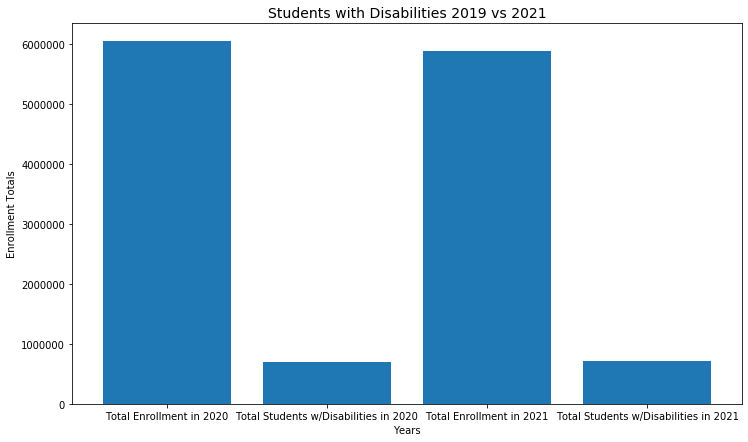

In [19]:
# create grouped barchart
df = pd.DataFrame({"Total Enrollment in 2020" : [sum_2020],
                   "Total Enrollment of Students with Disabilities in 2020":[disableSum_2020],
                   "Total Enrollment in 2021" : [sum_2021],
                   "Total Enrollment of Students with Disabilities in 2021":[disableSum_2021]
                   })

type_enrollments = ["Total Enrollment in 2020", "Total Students w/Disabilities in 2020", 
                    "Total Enrollment in 2021", "Total Students w/Disabilities in 2021" ]
enrollments = [df["Total Enrollment in 2020"].sum()
              ,df["Total Enrollment of Students with Disabilities in 2020"].sum()
              ,df["Total Enrollment in 2021"].sum()
              ,df["Total Enrollment of Students with Disabilities in 2021"].sum()]

x_axis = np.arange(len(type_enrollments))
plt.rcParams["figure.figsize"] = (12,7)
plt.bar(x_axis, enrollments, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_enrollments)
plt.title("Students with Disabilities 2019 vs 2021", fontsize = 14)
plt.xlabel("Years")
plt.ylabel("Enrollment Totals")
plt.savefig("Images/Disable.png")
plt.show()

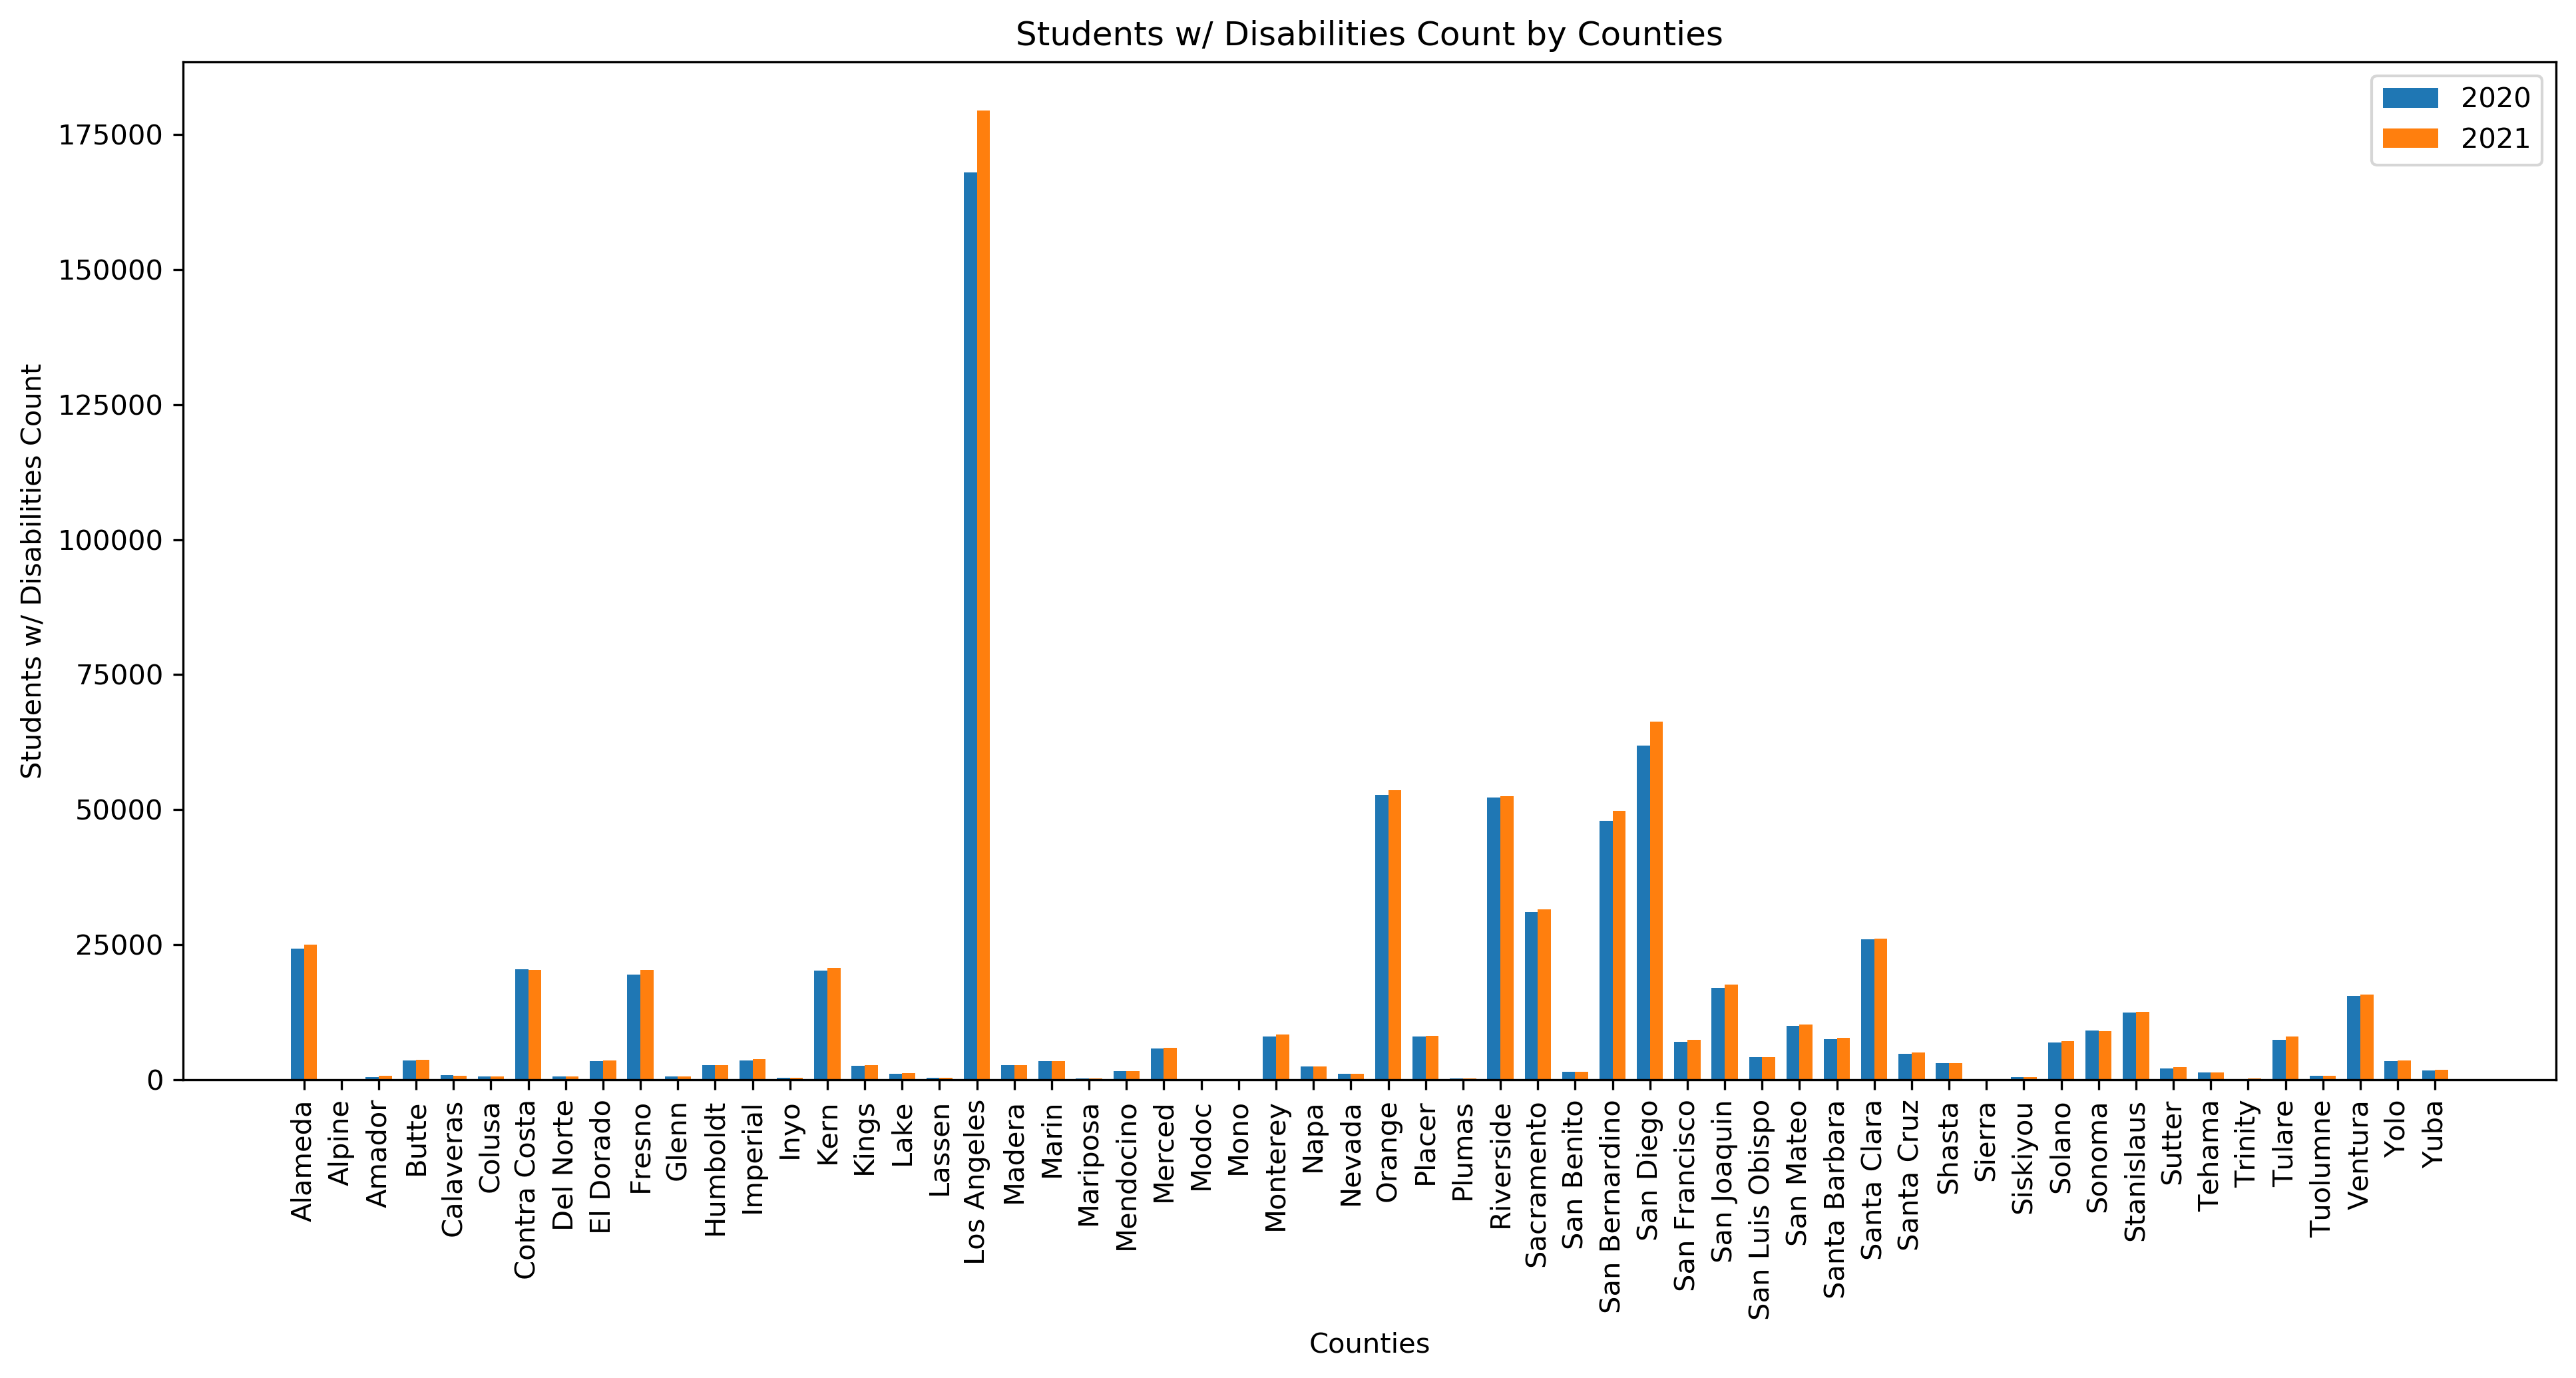

In [20]:
# comparing every county precoivd vs. covid 
ho_bar_df = combined_data_df.reset_index()
H1 = ho_bar_df['Students with Disabilities_2020']
H2 = ho_bar_df['Students with Disabilities_2021']
labels = ho_bar_df["CountyName"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(13, 7), dpi=300)
bar1 = ax.bar(x - width/2, H1, width, label='2020')
bar2 = ax.bar(x + width/2, H2, width, label='2021')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Students w/ Disabilities Count')
ax.set_xlabel('Counties')
ax.set_title('Students w/ Disabilities Count by Counties')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.legend()
fig.tight_layout()
plt.savefig("Images/DisableSUM.png")
plt.show()

### The average difference of Students with Disabilities enrollment percentage between 2019 and 2021 is 0.83%. The pandemic doesn't display a significant effect on overall enrollment of Students with Disabilities

###  Factor: Socioeconomically Disadvantaged

In [21]:
# extract column
social_df=pd.DataFrame(combined_data_df[["EnrollTotal_2020","Socioeconomically Disadvantaged_2020"\
                             ,"EnrollTotal_2021","Socioeconomically Disadvantaged_2021"]])

# add new columns for percentage 
social_df["percent_2020"] = round(social_df["Socioeconomically Disadvantaged_2020"]/social_df["EnrollTotal_2020"]*100,2)
social_df["percent_2021"] = round(social_df["Socioeconomically Disadvantaged_2021"]/social_df["EnrollTotal_2021"]*100,2)

# calculate average percentage difference
avgDiff_socio = (social_df["percent_2021"] - social_df["percent_2020"]).sum()/len(social_df)

# formatting columns
social_df["percent_2021"] = social_df["percent_2021"].map("%{:.2f}".format)
social_df["percent_2020"] = social_df["percent_2020"].map("%{:.2f}".format)
social_df.head()



,EnrollTotal_2020,Socioeconomically Disadvantaged_2020,EnrollTotal_2021,Socioeconomically Disadvantaged_2021,percent_2020,percent_2021
CountyName,,,,,,
Alameda,222812,95233,218094,90679,%42.74,%41.58
Alpine,70,43,73,45,%61.43,%61.64
Amador,3958,1607,3889,1674,%40.60,%43.04
Butte,28777,17222,27794,16940,%59.85,%60.95
Calaveras,4885,2511,4543,2251,%51.40,%49.55


In [22]:
socioDisadvan_2020 = social_df["Socioeconomically Disadvantaged_2020"].sum()
percentSocio_2020 = socioDisadvan_2020/sum_2020*100 

socioDisadvan_2021 = social_df["Socioeconomically Disadvantaged_2021"].sum()
percentSocio_2021 = socioDisadvan_2021/sum_2021*100

In [23]:
# create summary data frame
socioSummary_df = pd.DataFrame({"Total Enrollment in 2020" : [sum_2020],
                                  "Total Enrollment of Socioeconomically Disadvantaged students 2020":[socioDisadvan_2020],
                                  "Percent of Socioeconomically Disadvantaged students in 2020" : [percentSocio_2020],
                                  "Total Enrollment in 2021" : [sum_2021],
                                  "Total Enrollment of Socioeconomically Disadvantaged students in 2021":[socioDisadvan_2021],
                                  "Percent of Socioeconomically Disadvantaged students in 2021" : [percentSocio_2021],
                                  "Average percentage differnce" : [avgDiff_socio]
                                })

# formatting columns
socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2020"]\
=socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2020"].map("%{:.2f}".format)

socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2021"]\
=socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2021"].map("%{:.2f}".format)

socioSummary_df["Average percentage differnce"]\
=socioSummary_df["Average percentage differnce"].map("%{:.2f}".format)

socioSummary_df

,Total Enrollment in 2020,Total Enrollment of Socioeconomically Disadvantaged students 2020,Percent of Socioeconomically Disadvantaged students in 2020,Total Enrollment in 2021,Total Enrollment of Socioeconomically Disadvantaged students in 2021,Percent of Socioeconomically Disadvantaged students in 2021,Average percentage differnce
0,6038302,3663287,%60.67,5873395,3542861,%60.32,%-0.41


### Graphic Summary

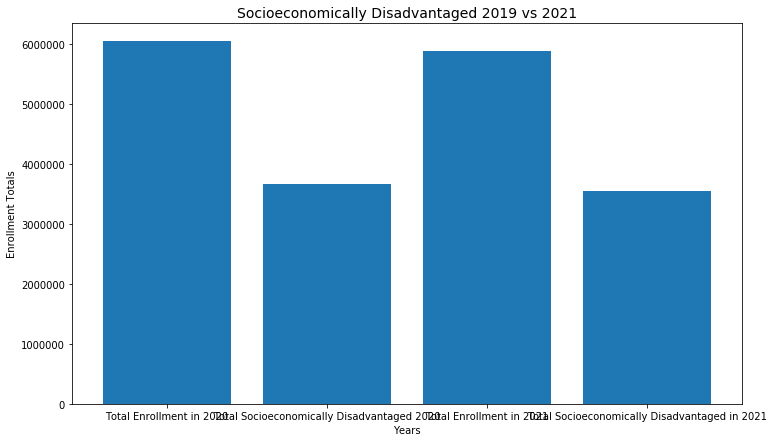

In [24]:
# create grouped barchart
df = pd.DataFrame({"Total Enrollment in 2020" : [sum_2020],
                   "Total Enrollment of Socioeconomically Disadvantaged students in 2020":[socioDisadvan_2020],
                   "Total Enrollment in 2021" : [sum_2021],
                   "Total Enrollment of Socioeconomically Disadvantaged students in 2021":[socioDisadvan_2021]
                   })

type_enrollments = ["Total Enrollment in 2020", "Total Socioeconomically Disadvantaged 2020", 
                    "Total Enrollment in 2021", "Total Socioeconomically Disadvantaged in 2021" ]

enrollments = [df["Total Enrollment in 2020"].sum()
              ,df["Total Enrollment of Socioeconomically Disadvantaged students in 2020"].sum()
              ,df["Total Enrollment in 2021"].sum()
              ,df["Total Enrollment of Socioeconomically Disadvantaged students in 2021"].sum()]

x_axis = np.arange(len(type_enrollments))
plt.rcParams["figure.figsize"] = (12,7)
plt.bar(x_axis, enrollments, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_enrollments)
plt.title("Socioeconomically Disadvantaged 2019 vs 2021", fontsize = 14)
plt.xlabel("Years")
plt.ylabel("Enrollment Totals")
plt.savefig("Images/Socio.png")
plt.show()

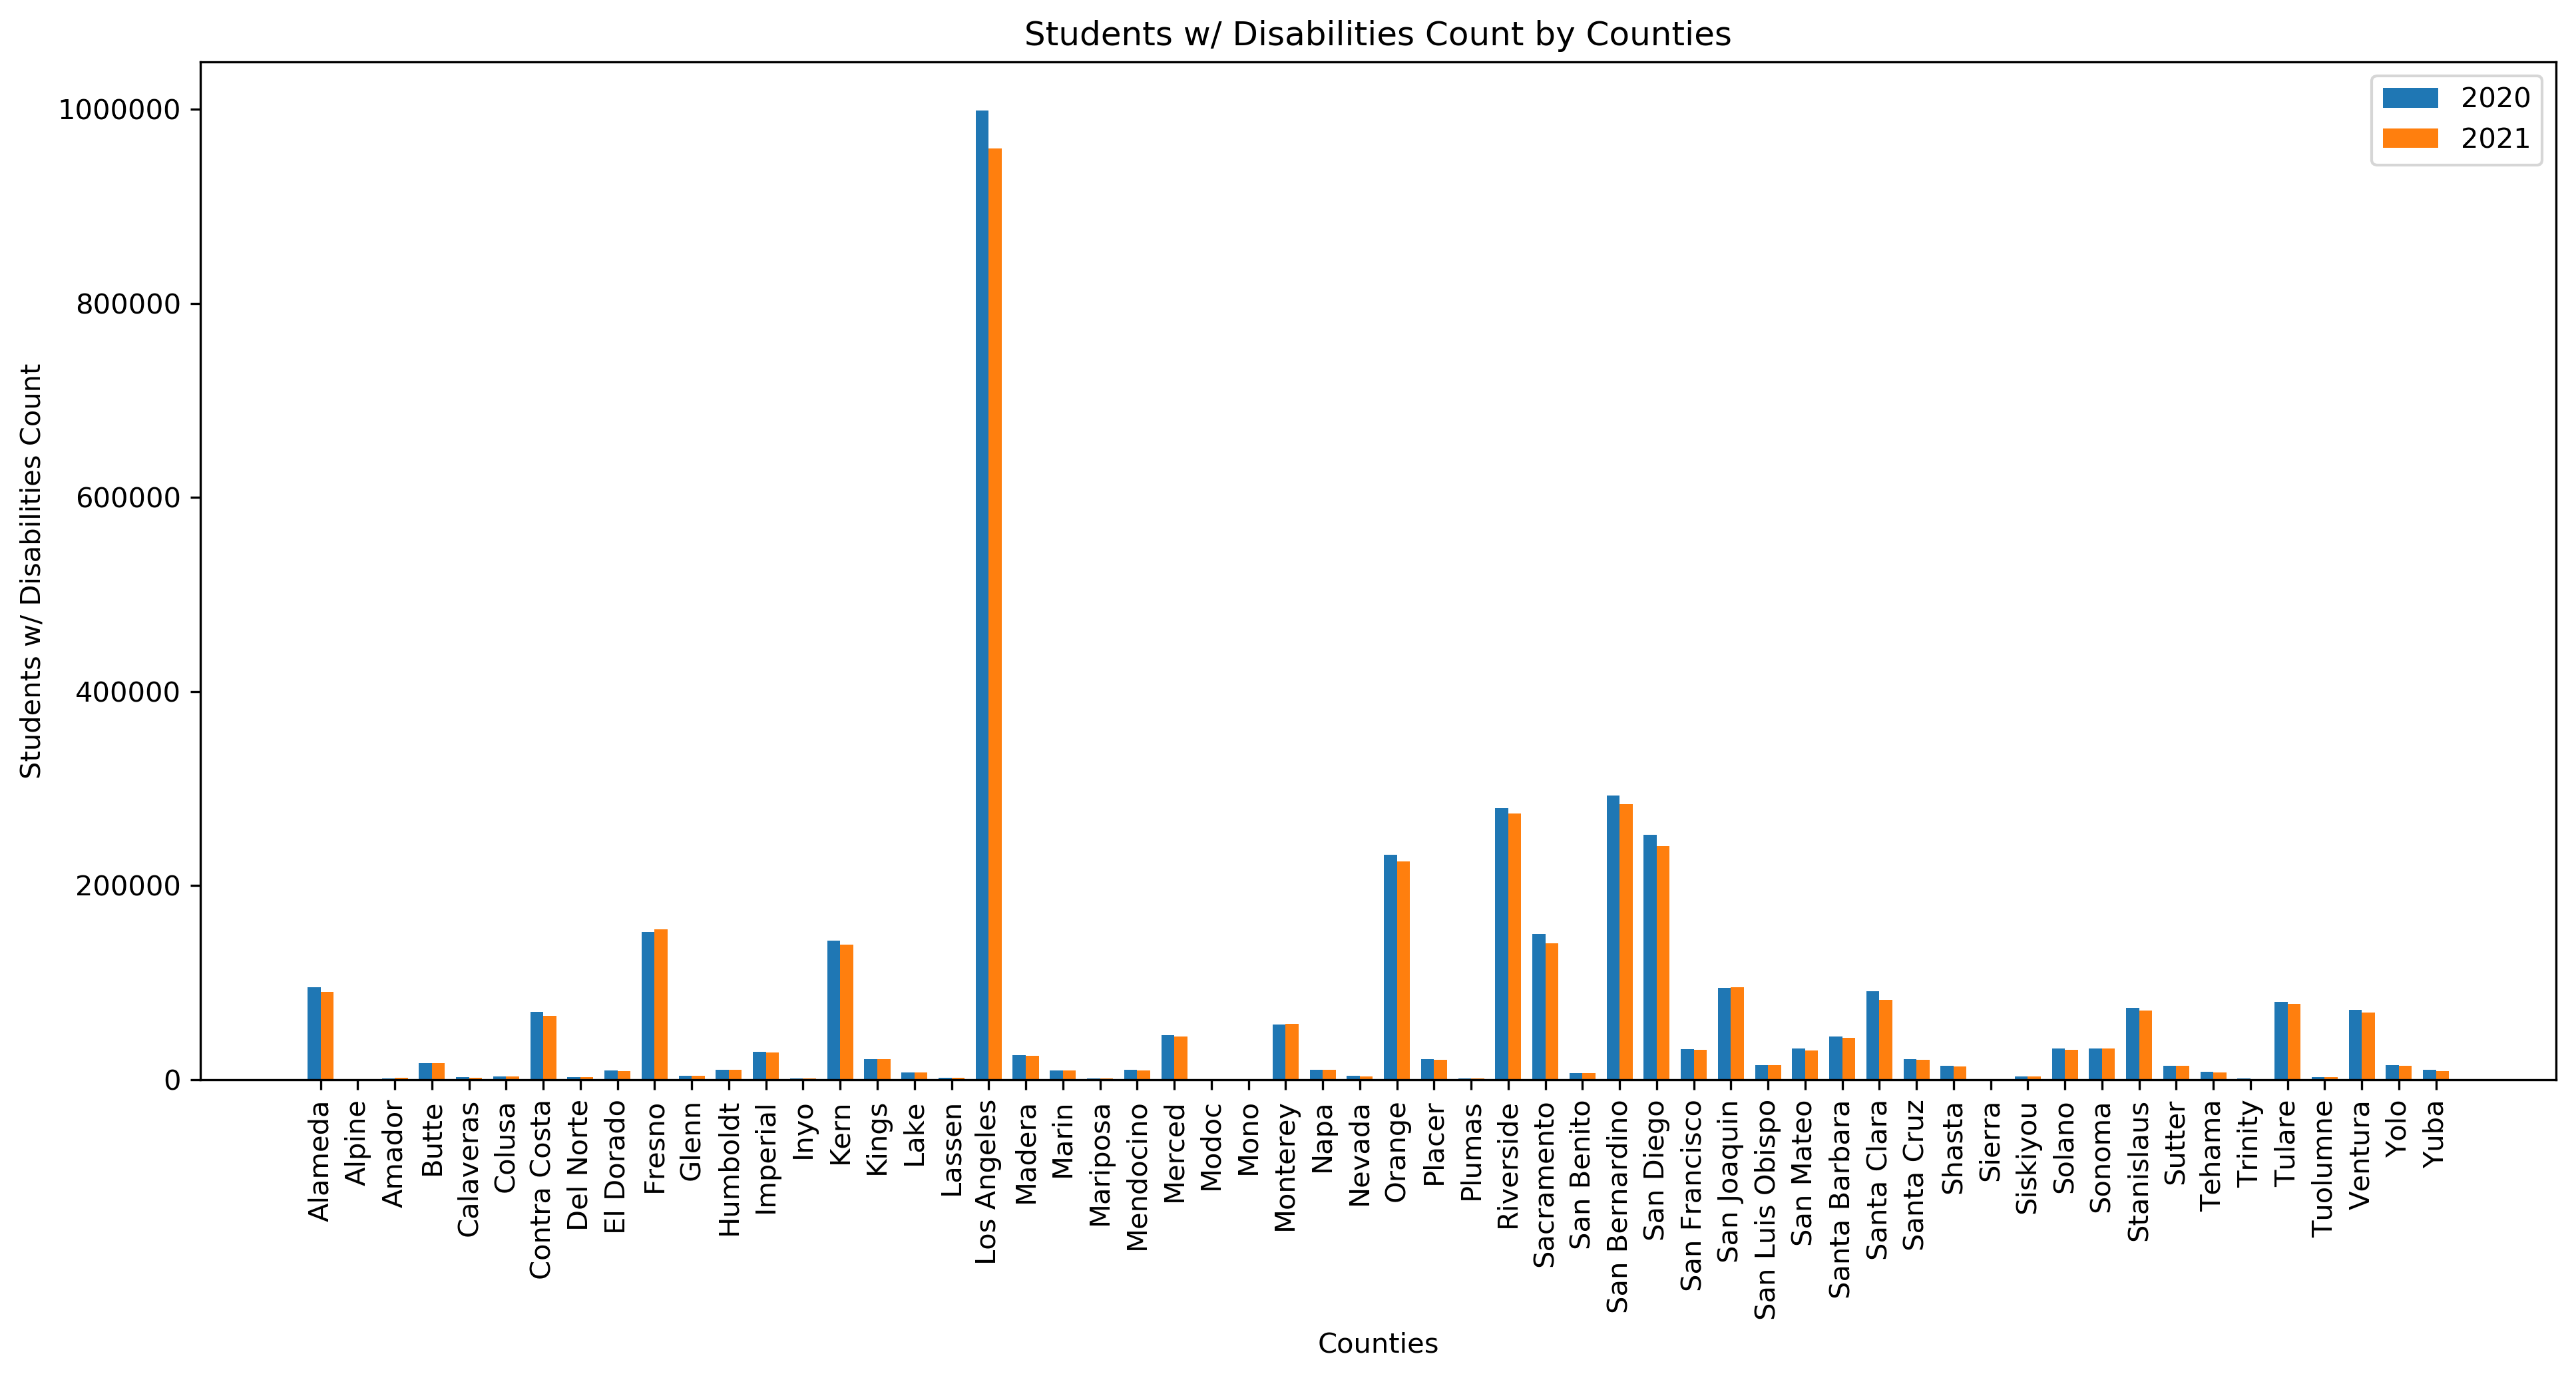

In [25]:
# comparing every county precoivd vs. covid 
ho_bar_df = combined_data_df.reset_index()
H1 = ho_bar_df['Socioeconomically Disadvantaged_2020']
H2 = ho_bar_df['Socioeconomically Disadvantaged_2021']
labels = ho_bar_df["CountyName"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(13, 7), dpi=300)
bar1 = ax.bar(x - width/2, H1, width, label='2020')
bar2 = ax.bar(x + width/2, H2, width, label='2021')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Students w/ Disabilities Count')
ax.set_xlabel('Counties')
ax.set_title('Students w/ Disabilities Count by Counties')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.legend()
fig.tight_layout()
plt.savefig("Images/SocioSUM.png")
plt.show()

###  The average difference of Socioeconomically Disadvantaged Students enrollment percentage between 2019 and 2021 is -0.41%. The pandemic doesn't display a significant effect on overall enrollment of Socioeconomically Disadvantaged Students


### Factor:  Foster Care Children

In [26]:
#reduce columns and added a percent column

foster_care_df = combined_data_df[["EnrollTotal_2020", "Foster Care_2020", "EnrollTotal_2021", "Foster Care_2021"]]
foster_care_df

foster_care_df["Percent Total 2020"] = (foster_care_df["Foster Care_2020"]/foster_care_df["EnrollTotal_2020"]*100)
foster_care_df["Percent Total 2021"] = (foster_care_df["Foster Care_2021"]/foster_care_df["EnrollTotal_2021"]*100)

foster_care_df.style.format(
    {"Percent Total 2020":"{:,.3f}%",
     "Percent Total 2021":"{:,.3f}%"   
    })

foster_care_df.head()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,EnrollTotal_2020,Foster Care_2020,EnrollTotal_2021,Foster Care_2021,Percent Total 2020,Percent Total 2021
CountyName,,,,,,
Alameda,222812,402,218094,442,0.180421,0.202665
Alpine,70,2,73,0,2.857143,0.000000
Amador,3958,19,3889,23,0.480040,0.591412
Butte,28777,247,27794,245,0.858324,0.881485
Calaveras,4885,70,4543,40,1.432958,0.880475


In [27]:


#did a sum of all rows, created a new data frame, formated numbers

total_foster_enrollment_2020 = foster_care_df["EnrollTotal_2020"].sum()
total_foster_2020 = foster_care_df["Foster Care_2020"].sum()
total_percent_2020 = total_foster_2020/total_foster_enrollment_2020*100

total_foster_enrollment_2021 = foster_care_df["EnrollTotal_2021"].sum()
total_foster_2021 = foster_care_df["Foster Care_2021"].sum()
total_percent_2021 = total_foster_2021/total_foster_enrollment_2021*100 

foster_summary_df = pd.DataFrame({
    "Total Enrollment 2020": [total_foster_enrollment_2020],
    "Total Foster 2020": [total_foster_2020],
    "Percent of Foster 2020": [total_percent_2020],
    "Total Enrollment 2021": [total_foster_enrollment_2021],
    "Total Foster 2021": [total_foster_2021],
    "Percent of Foster 2021": [total_percent_2021]
})

foster_summary_df.style.format({
    "Total Enrollment 2020": "{:,.2f}",
    "Total Foster 2020": "{:,.2f}",
    "Percent of Foster 2020": "{:,.3f}%",
    "Total Enrollment 2021": "{:,.2f}",
    "Total Foster 2021": "{:,.2f}",
    "Percent of Foster 2021": "{:,.3f}%"
})


,Total Enrollment 2020,Total Foster 2020,Percent of Foster 2020,Total Enrollment 2021,Total Foster 2021,Percent of Foster 2021
0,"6,038,302.00","31,583.00",0.523%,"5,873,395.00","30,783.00",0.524%


### Graphic Summary

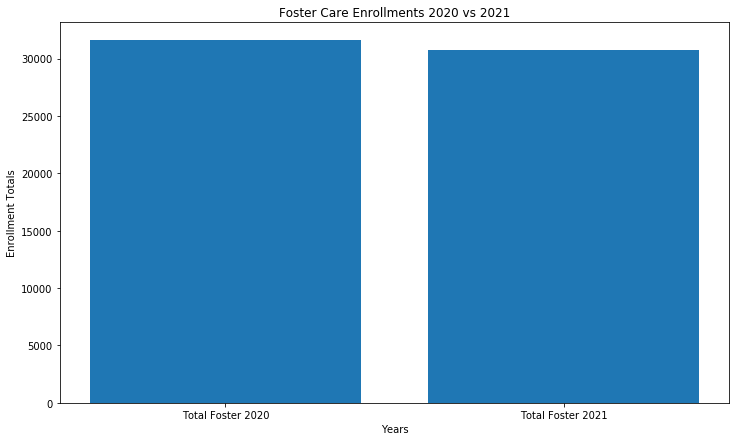

In [28]:
#created bar graph for foster enrollments

type_enrollments = ["Total Foster 2020", "Total Foster 2021" ]
enrollments = [31583, 30783]
x_axis = np.arange(len(enrollments))

plt.bar(x_axis, enrollments, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_enrollments)

plt.title("Foster Care Enrollments 2020 vs 2021")
plt.xlabel("Years")
plt.ylabel("Enrollment Totals")

plt.savefig("Images/Foster.png")
plt.show() 

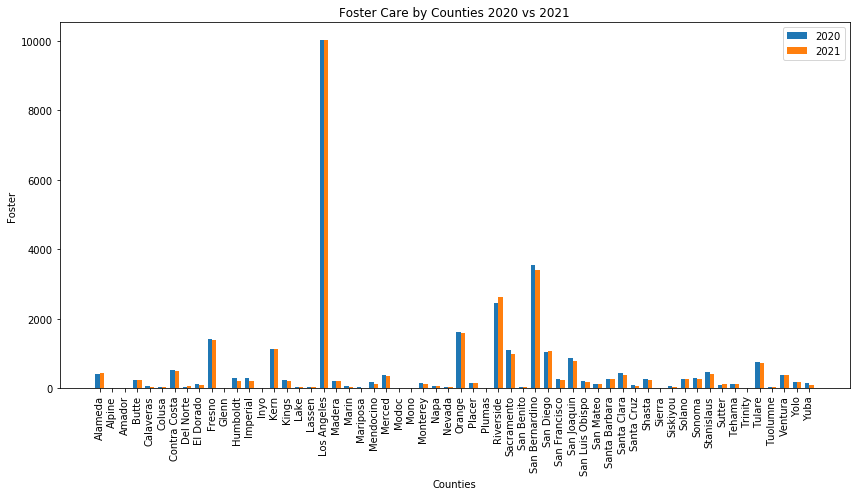

In [29]:
# show counties comparision
foster_care_bar_df = combined_data_df.reset_index()
FC_2020 = foster_care_bar_df['Foster Care_2020']
FC_2021 = foster_care_bar_df['Foster Care_2021']
foster_labels = foster_care_bar_df["CountyName"]

x = np.arange(len(foster_labels))  
width = 0.35 
fig, ax = plt.subplots(figsize=(12, 7))
# dpi=300
fc_bar1 = ax.bar(x - width/2, FC_2020, width, label='2020')
fc_bar2 = ax.bar(x + width/2, FC_2021, width, label='2021')


#added titles and labels
ax.set_ylabel('Foster')
ax.set_xlabel('Counties')
ax.set_title('Foster Care by Counties 2020 vs 2021')
ax.set_xticks(x)
ax.set_xticklabels(foster_labels, rotation="vertical")
ax.legend()
fig.tight_layout()
plt.savefig("Images/FosterSUM.png")
plt.show()

### Factor: Migrant

In [30]:
migrant_df = combined_data_df[["EnrollTotal_2020", "Migrant_2020", "EnrollTotal_2021", "Migrant_2021"]]
migrant_df

migrant_df["Percent Total 2020"] = (migrant_df["Migrant_2020"]/migrant_df["EnrollTotal_2020"]*100)
migrant_df["Percent Total 2021"] = (migrant_df["Migrant_2021"]/migrant_df["EnrollTotal_2021"]*100)

migrant_df.style.format(
    {"Percent Total 2020":"{:,.3f}%",
     "Percent Total 2021":"{:,.3f}%"
    })

migrant_df.head()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,EnrollTotal_2020,Migrant_2020,EnrollTotal_2021,Migrant_2021,Percent Total 2020,Percent Total 2021
CountyName,,,,,,
Alameda,222812,989,218094,855,0.443872,0.392033
Alpine,70,0,73,0,0.000000,0.000000
Amador,3958,0,3889,0,0.000000,0.000000
Butte,28777,123,27794,67,0.427425,0.241059
Calaveras,4885,0,4543,0,0.000000,0.000000


In [31]:
# summary table
total_migrant_enrollment_2020 = migrant_df["EnrollTotal_2020"].sum()
total_migrant_2020 = migrant_df["Migrant_2020"].sum()
total_migrant_percent_2020 = total_migrant_2020/total_migrant_enrollment_2020*100 

total_migrant_enrollment_2021 = migrant_df["EnrollTotal_2021"].sum()
total_migrant_2021 = migrant_df["Migrant_2021"].sum()
total_migrant_percent_2021 = total_migrant_2021/total_migrant_enrollment_2021*100 

foster_summary_df = pd.DataFrame({
    "Total Enrollment 2020": [total_migrant_enrollment_2020],
    "Total Migrant 2020": [total_migrant_2020],
    "Percent of Migrant 2020": [total_migrant_percent_2020],
    "Total Enrollment 2021": [total_migrant_enrollment_2021],
    "Total Migrant 2021": [total_migrant_2021],
    "Percent of Migrant 2021": [total_migrant_percent_2021]
})

foster_summary_df.style.format({
    "Total Enrollment 2020": "{:,.2f}",
    "Total Migrant 2020": "{:,.2f}",
    "Percent of Migrant 2020": "{:,.3f}%",
    "Total Enrollment 2021": "{:,.2f}",
    "Total Migrant 2021": "{:,.2f}",
    "Percent of Migrant 2021": "{:,.3f}%"
})

,Total Enrollment 2020,Total Migrant 2020,Percent of Migrant 2020,Total Enrollment 2021,Total Migrant 2021,Percent of Migrant 2021
0,"6,038,302.00","47,268.00",0.783%,"5,873,395.00","46,409.00",0.790%


### Graphic Summary

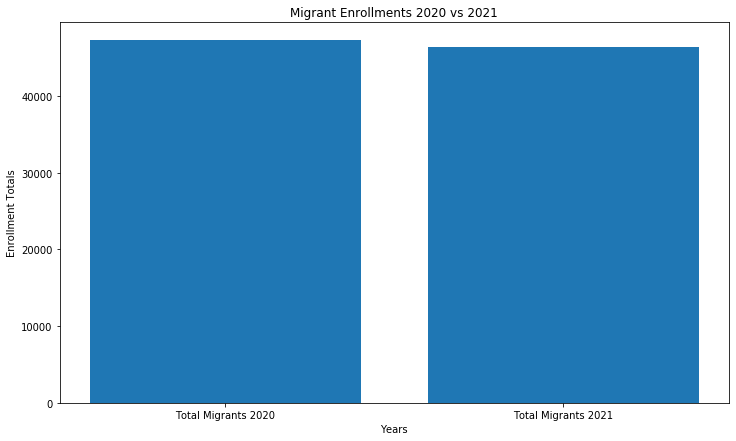

In [32]:
# created bar graph for migrant enrollments

type_of_enrollments = ["Total Migrants 2020", "Total Migrants 2021" ]
enrollment_numb = [47268, 46409]
x_axis = np.arange(len(enrollments))

plt.bar(x_axis, enrollment_numb, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_of_enrollments)

plt.title("Migrant Enrollments 2020 vs 2021")
plt.xlabel("Years")
plt.ylabel("Enrollment Totals")
plt.savefig("Images/Migrant.png")
plt.show()

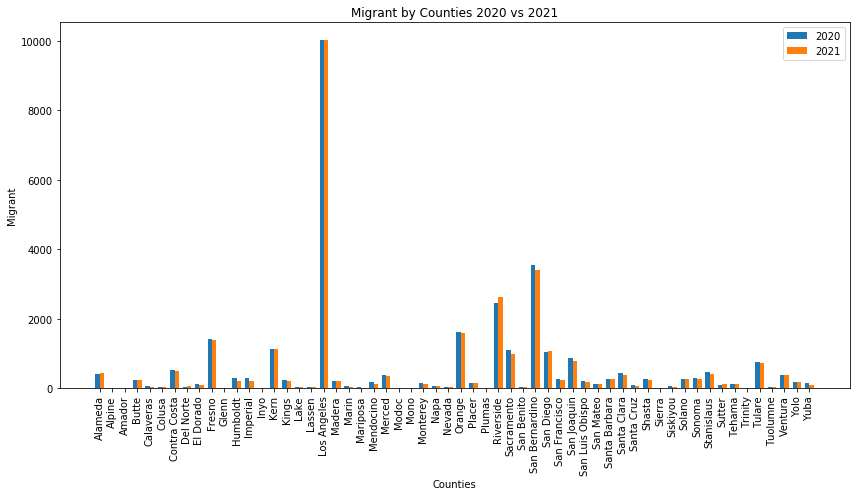

In [33]:
# Compary between every counties
migrant_bar_df = combined_data_df.reset_index()
m_2020 = foster_care_bar_df['Migrant_2020']
m_2021 = foster_care_bar_df['Migrant_2021']
migrant_labels = foster_care_bar_df["CountyName"]

x = np.arange(len(foster_labels))  
width = 0.35 
fig, ax = plt.subplots(figsize=(12, 7))

fc_bar1 = ax.bar(x - width/2, FC_2020, width, label='2020')
fc_bar2 = ax.bar(x + width/2, FC_2021, width, label='2021')


#added titles and labels
ax.set_ylabel('Migrant')
ax.set_xlabel('Counties')
ax.set_title('Migrant by Counties 2020 vs 2021')
ax.set_xticks(x)
ax.set_xticklabels(foster_labels, rotation="vertical")
ax.legend()
fig.tight_layout()
plt.savefig("Images/MigrantSUM.png")
plt.show()

###  Factor: Students Race/Ethnicity Demographics

In [34]:
# create race/ethnicity total percentages for 2020
AA_2020 = combined_data_df['African American_2020'].sum()
AI_2020 = combined_data_df['American Indian_2020'].sum()
AS_2020 = combined_data_df['Asian_2020'].sum()
HI_2020 = combined_data_df['Hispanic_2020'].sum()
WH_2020 = combined_data_df['White_2020'].sum()
PI_2020 = combined_data_df['Pacific Islander_2020'].sum()
FI_2020 = combined_data_df['Filipino_2020'].sum()
MR_2020 = combined_data_df['Two or More Races_2020'].sum()
NR_2020 = combined_data_df['Not Reported Races_2020'].sum()

tot_enroll_2020 = combined_data_df['EnrollTotal_2020'].sum()

AA_percentage_2020 = AA_2020/tot_enroll_2020*100
AI_percentage_2020 = AI_2020/tot_enroll_2020*100
AS_percentage_2020 = AS_2020/tot_enroll_2020*100
HI_percentage_2020 = HI_2020/tot_enroll_2020*100
WH_percentage_2020 = WH_2020/tot_enroll_2020*100
PI_percentage_2020 = PI_2020/tot_enroll_2020*100
FI_percentage_2020 = FI_2020/tot_enroll_2020*100
MR_percentage_2020 = MR_2020/tot_enroll_2020*100
NR_percentage_2020 = NR_2020/tot_enroll_2020*100

In [35]:
# create race/ethnicity percentages for 2021
AA_2021 = combined_data_df['African American_2021'].sum()
AI_2021 = combined_data_df['American Indian_2021'].sum()
AS_2021 = combined_data_df['Asian_2021'].sum()
HI_2021 = combined_data_df['Hispanic_2021'].sum()
WH_2021 = combined_data_df['White_2021'].sum()
PI_2021 = combined_data_df['Pacific Islander_2021'].sum()
FI_2021 = combined_data_df['Filipino_2021'].sum()
MR_2021 = combined_data_df['Two or More Races_2021'].sum()
NR_2021 = combined_data_df['Not Reported Races_2021'].sum()

tot_enroll_2021 = combined_data_df['EnrollTotal_2021'].sum()

AA_percentage_2021 = AA_2021/tot_enroll_2021*100
AI_percentage_2021 = AI_2021/tot_enroll_2021*100
AS_percentage_2021 = AS_2021/tot_enroll_2021*100
HI_percentage_2021 = HI_2021/tot_enroll_2021*100
WH_percentage_2021 = WH_2020/tot_enroll_2021*100
PI_percentage_2021 = PI_2020/tot_enroll_2021*100
FI_percentage_2021 = FI_2021/tot_enroll_2021*100
MR_percentage_2021 = MR_2021/tot_enroll_2021*100
NR_percentage_2021 = NR_2021/tot_enroll_2021*100


In [36]:
#create summary df for pie chart
summary_race2020_percent = pd.DataFrame({"African American": [AA_percentage_2020],
                                          "American Indian": [AI_percentage_2020],
                                          "Asian": [AS_percentage_2020],
                                          "Filipino": [FI_percentage_2020],
                                          "Hispanic": [HI_percentage_2020],
                                          "Pacific Islander": [PI_percentage_2020],
                                          "White": [WH_percentage_2020],
                                          "Two or More Races": [MR_percentage_2020],
                                          "Not Reported": [NR_percentage_2020]})

In [37]:
#create summary df for pie chart
summary_race2021_percent = pd.DataFrame({"African American": [AA_percentage_2021],
                                          "American Indian": [AI_percentage_2021],
                                          "Asian": [AS_percentage_2021],
                                          "Filipino": [FI_percentage_2021],
                                          "Hispanic": [HI_percentage_2021],
                                          "Pacific Islander": [PI_percentage_2021],
                                          "White": [WH_percentage_2021],
                                          "Two or More Races": [MR_percentage_2021],
                                          "Not Reported": [NR_percentage_2021]})

In [38]:
#format summary race table

race_labels = ["African American", "American Indian", "Asian", "Filipino", "Hispanic", "Pacific Islander", "White", "Two or More Races", "Not Reported", "All Races"]
summary_race = pd.DataFrame({"Race": race_labels,
"Percent 2020": [AA_percentage_2020, AI_percentage_2020, AS_percentage_2020, FI_percentage_2020, HI_percentage_2020, PI_percentage_2020, WH_percentage_2020, MR_percentage_2020, NR_percentage_2020, 100],
"Percent 2021": [AA_percentage_2021, AI_percentage_2021, AS_percentage_2021, FI_percentage_2021, HI_percentage_2021, PI_percentage_2021, WH_percentage_2021, MR_percentage_2021, NR_percentage_2021, 100],
"Total Count 2020": [AA_2020, AI_2020, AS_2020, FI_2020, HI_2020, PI_2020, WH_2020, MR_2020, NR_2020, tot_enroll_2020],
"Total Count 2021": [AA_2021, AI_2021, AS_2021, FI_2021, HI_2021, PI_2021, WH_2021, MR_2021, NR_2021, tot_enroll_2021]})
summary_race["Percent 2020"] = summary_race["Percent 2020"].map("{:.2f}%".format)
summary_race["Percent 2021"] = summary_race["Percent 2021"].map("{:.2f}%".format)
summary_race["Percentage Point Diff"]=[AA_percentage_2021-AA_percentage_2020, AI_percentage_2021-AI_percentage_2020, AS_percentage_2021-AS_percentage_2020, FI_percentage_2021-FI_percentage_2020, HI_percentage_2021-HI_percentage_2020, PI_percentage_2021-PI_percentage_2020, WH_percentage_2021-WH_percentage_2020, MR_percentage_2021-MR_percentage_2020, NR_percentage_2021-NR_percentage_2020, 0]
print(f"Average total percentage point difference:")
print(summary_race["Percentage Point Diff"].mean())
summary_race

Average total percentage point difference:
0.1331802134881092


,Race,Percent 2020,Percent 2021,Total Count 2020,Total Count 2021,Percentage Point Diff
0,African American,5.22%,5.11%,315128,300244,-0.106885
1,American Indian,0.49%,0.47%,29464,27558,-0.018751
2,Asian,9.43%,9.62%,569119,565295,0.199522
3,Filipino,2.40%,2.40%,144864,140952,0.000754
4,Hispanic,54.88%,55.35%,3313650,3251013,0.474331
5,Pacific Islander,0.44%,0.46%,26769,25823,0.012447
6,White,22.36%,22.99%,1350166,1272890,0.627801
7,Two or More Races,3.94%,4.09%,237658,240477,0.158503
8,Not Reported,0.85%,0.84%,51484,49143,-0.015919
9,All Races,100.00%,100.00%,6038302,5873395,0.000000


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


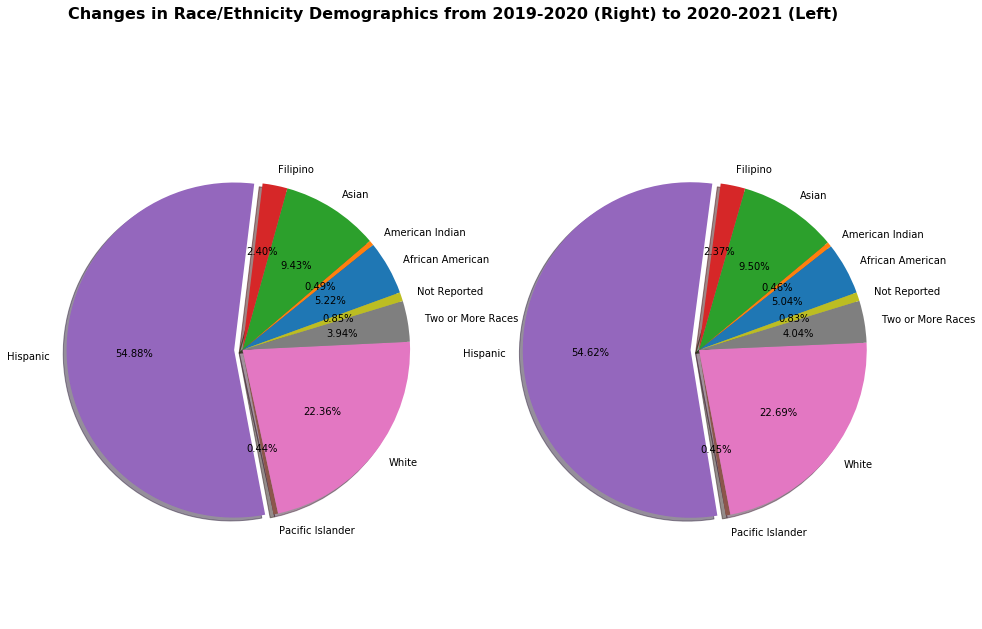

In [39]:
# create a side by side pie chart
race_pie_labels = 'African American', 'American Indian', 'Asian', 'Filipino', 'Hispanic', 'Pacific Islander', 'White', 'Two or More Races', 'Not Reported'
explode = (0, 0, 0, 0, 0.05, 0, 0, 0, 0)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle("Changes in Race/Ethnicity Demographics from 2019-2020 (Right) to 2020-2021 (Left)", fontsize=16, fontweight="bold")
ax1.pie(summary_race2020_percent, explode = explode, labels=race_pie_labels, autopct='%.2f%%', shadow=True, startangle=20)
ax1.axis('equal')
ax2.pie(summary_race2021_percent, explode = explode, labels=race_pie_labels, autopct='%.2f%%', shadow=True, startangle=20)
ax2.axis('equal')
plt.show()


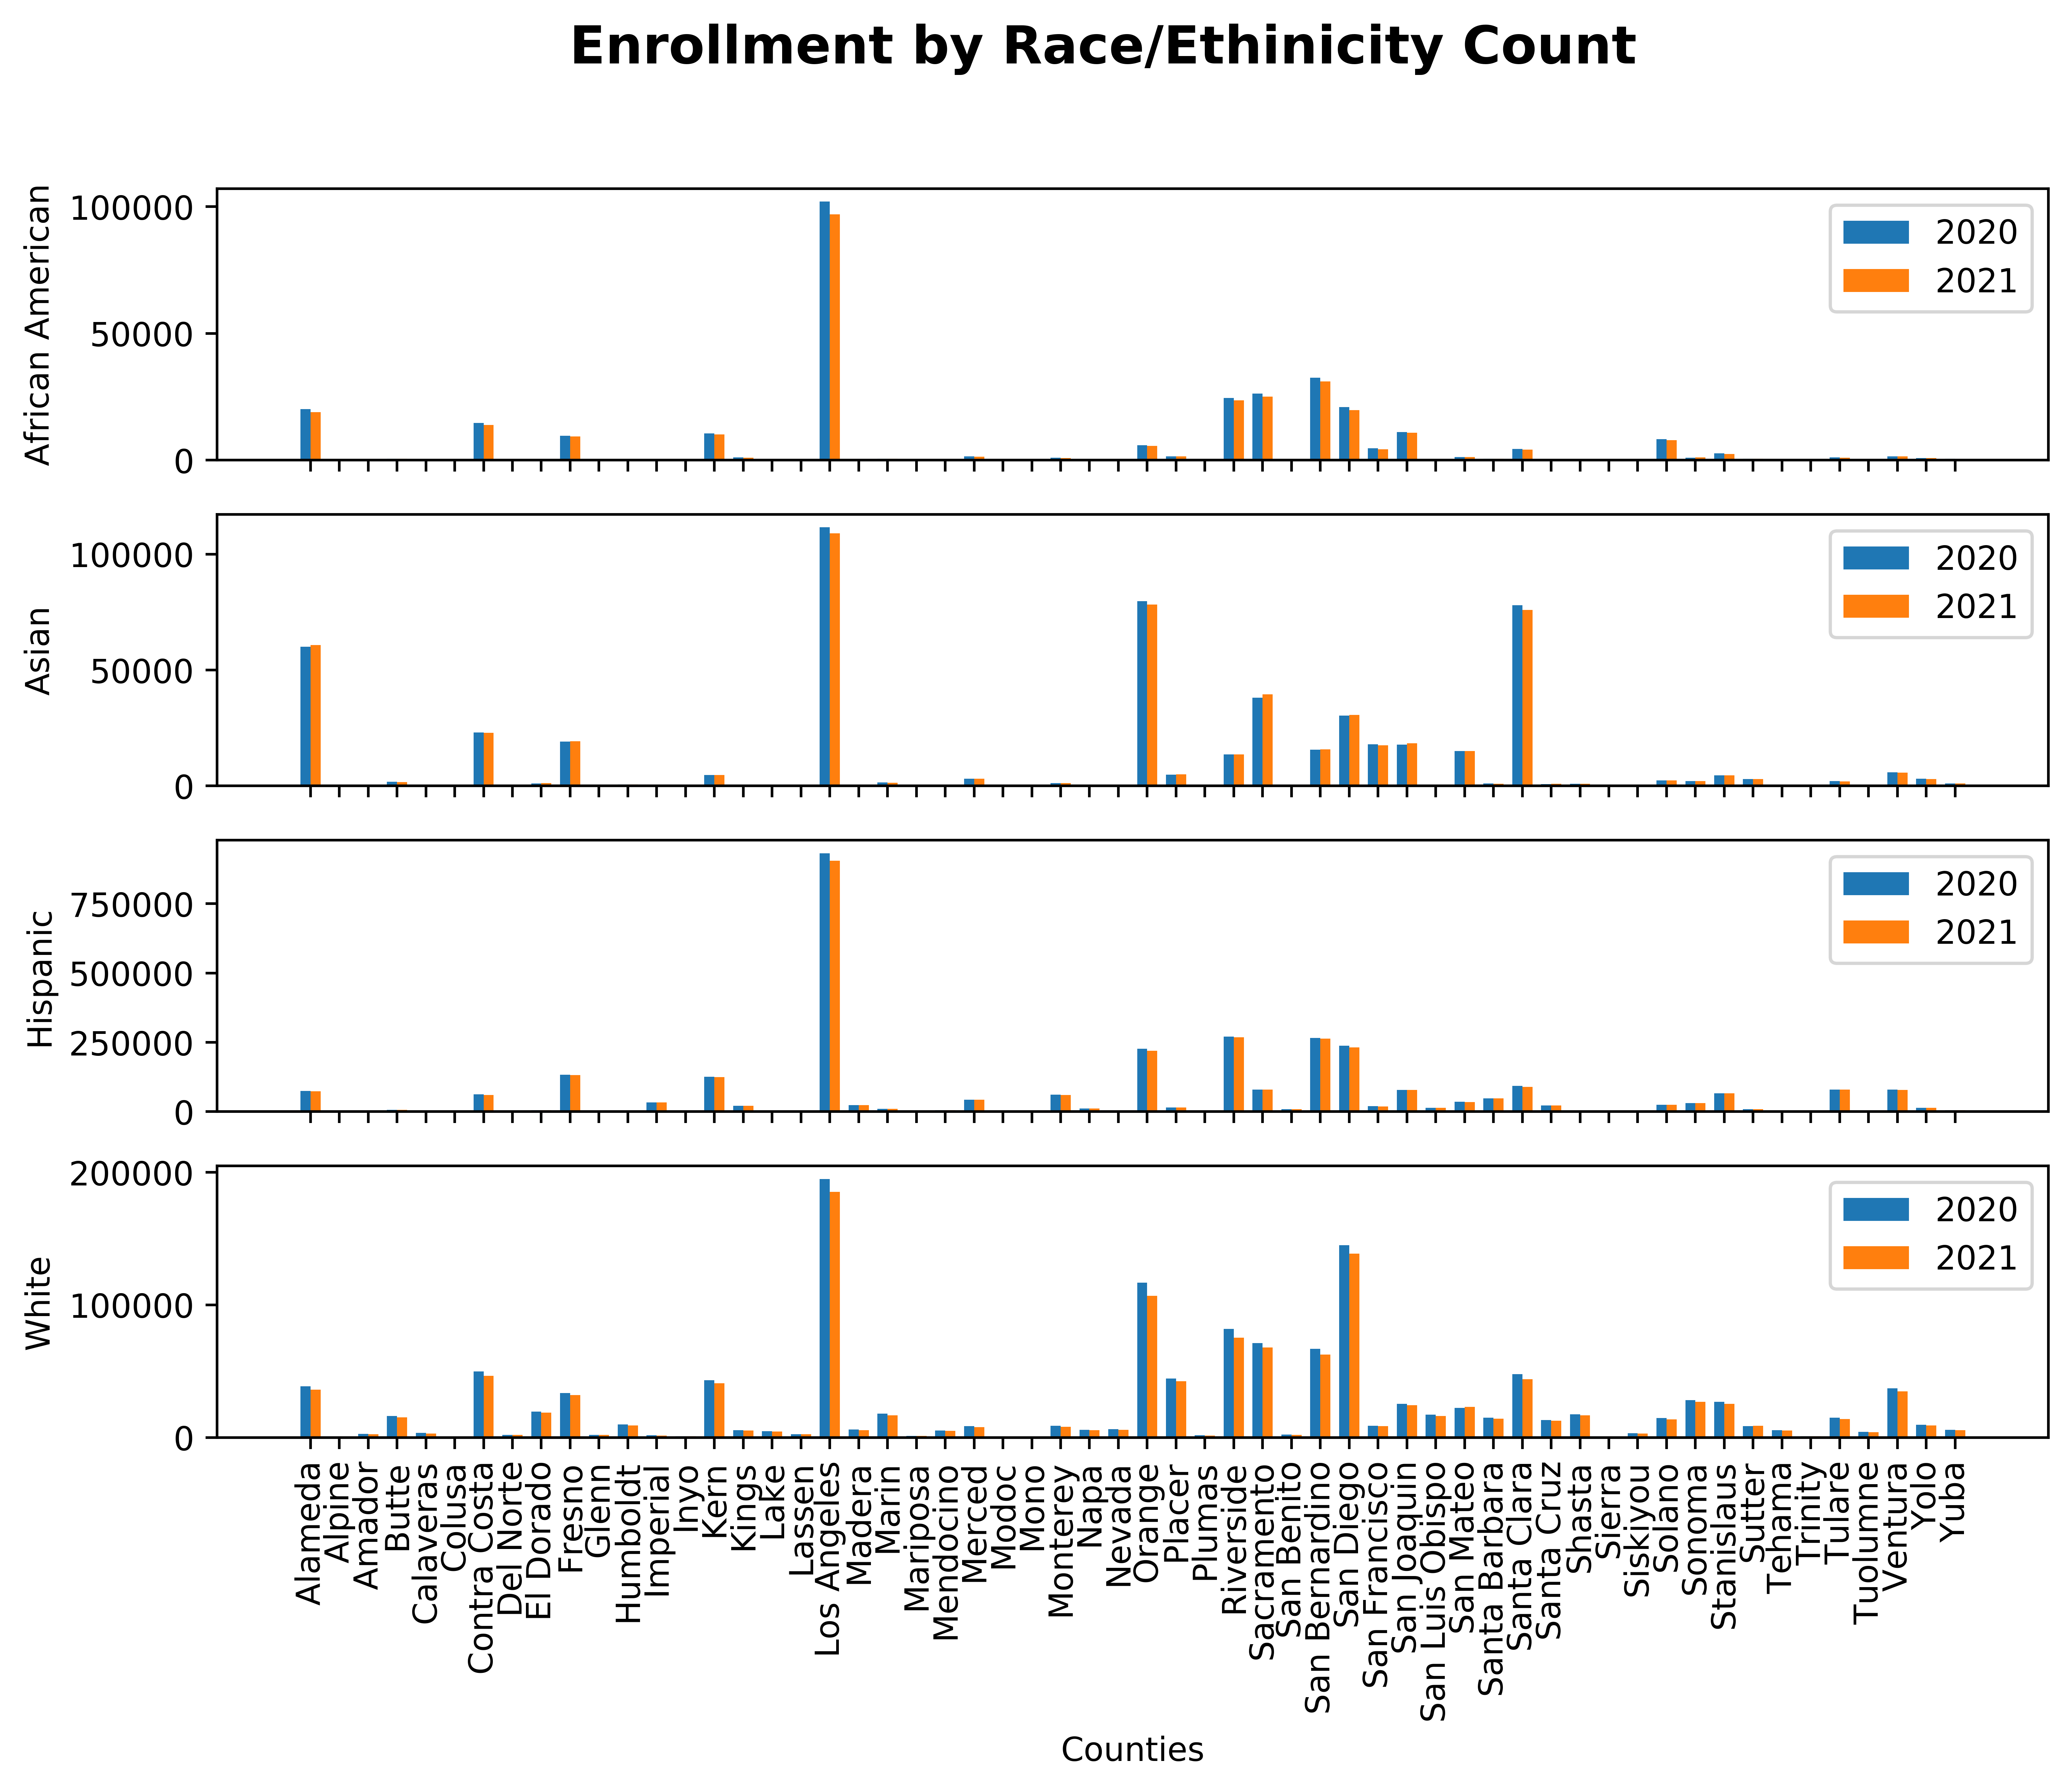

In [40]:
#create a grouped sharex graphic for race/ethincity demographics
bar_df = combined_data_df.reset_index()

AA1 = bar_df['African American_2020']
AA2 = bar_df['African American_2021']

AS1 = bar_df['Asian_2020']
AS2 = bar_df['Asian_2021']

HI1 = bar_df['Hispanic_2020']
HI2 = bar_df['Hispanic_2021']

WH1 = bar_df['White_2020']
WH2 = bar_df['White_2021']

labels = bar_df["CountyName"]
x = np.arange(len(labels))
width = 0.35

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(10, 7), dpi=700)
fig.suptitle("Enrollment by Race/Ethinicity Count", fontsize=16, fontweight="bold")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.bar(x - width/2, AA1, width, label='2020')
ax1.bar(x + width/2, AA2, width, label='2021')
ax1.set_ylabel('African American')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation="vertical")
ax1.legend()

ax2.bar(x - width/2, AS1, width, label='2020')
ax2.bar(x + width/2, AS2, width, label='2021')
ax2.set_ylabel('Asian')
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation="vertical")
ax2.legend()

ax3.bar(x - width/2, HI1, width, label='2020')
ax3.bar(x + width/2, HI2, width, label='2021')
ax3.set_ylabel('Hispanic')
ax3.set_xticks(x)
ax3.set_xticklabels(labels, rotation="vertical")
ax3.legend()

ax4.bar(x - width/2, WH1, width, label='2020')
ax4.bar(x + width/2, WH2, width, label='2021')
ax4.set_ylabel('White')
ax4.set_xlabel('Counties')
ax4.set_xticks(x)
ax4.set_xticklabels(labels, rotation="vertical")
ax4.legend()

plt.show()

##### From 2020 to 2021, most total students in CA, categorized by race increased in enrollment with the exception of African American which decreased by 0.11 percentage points, American Indian by 0.1 percentage points, and Two or More Races by 0.16 percentage points (see summary_race table). All of these values are incredibly small which aligns with the other data that generally there was not a big population difference from the 2019-2020 to the 2020-2021 school years. The Changes in Race/Ethnicity Demographics from 2019-2020 (Right) to 2020-2021 (Left) pie chart further supports this. There can also be outside factors that could explain the approx. 1,000,000 loss in students between those including the increasing cost of living and unemployment, and stagnating wages. In a future analysis, it would be interesting to include these factors in a multiple regression analysis or at least correlate positive cases and a financial indicator by county. Unfortunately, financial data by CA county is not yet available for 2020-2021 which is a limitation of our study. Additionally, although the data is as current as November 9th when we pulled the COVID data, we are not able to compare one full year to another full year. Looking at the Enrollment by Race/Ethinicity Count Bar chart shows racial differences by CA County, there seem to be larger enrollment gaps when looking at more populated counties like Los Angeles, Santa Clara, and Orange counties compared to counties with smaller student populations. 

###  Factor: Students Experiencing Homelessness

In [41]:
homeless_df = pd.DataFrame(combined_data_df[["EnrollTotal_2020","Homeless_2020","EnrollTotal_2021","Homeless_2021"]])
homeless_df["Homeless Percent 2020"] = homeless_df["Homeless_2020"]/homeless_df["EnrollTotal_2020"]*100
homeless_df["Homeless Percent 2021"] = homeless_df["Homeless_2021"]/homeless_df["EnrollTotal_2021"]*100
percent_delta = (homeless_df["Homeless Percent 2021"]-homeless_df["Homeless Percent 2020"]).sum()/len(homeless_df)
print(f" The average percentage change in enrollment among students experiencing homelessness was a {round(percent_delta, 3)}% increase from the school year 2019-200 to 2020-2021.")
homeless_df["Homeless Percent 2020"] = homeless_df["Homeless Percent 2020"].map("{:.2f}%".format)
homeless_df["Homeless Percent 2021"] = homeless_df["Homeless Percent 2021"].map("{:.2f}%".format)
homeless_df = homeless_df.rename(columns={"EnrollTotal_2020": "Total Enrollment 2020","Homeless_2020": "Homeless Count 2020","EnrollTotal_2021": "Total Enrollment 2021","Homeless_2021": "Homeless Count 2021"})                                                                             
homeless_df.head(10)

 The average percentage change in enrollment among students experiencing homelessness was a -0.022% increase from the school year 2019-200 to 2020-2021.


,Total Enrollment 2020,Homeless Count 2020,Total Enrollment 2021,Homeless Count 2021,Homeless Percent 2020,Homeless Percent 2021
CountyName,,,,,,
Alameda,222812,3062,218094,2825,1.37%,1.30%
Alpine,70,14,73,9,20.00%,12.33%
Amador,3958,75,3889,118,1.89%,3.03%
Butte,28777,1234,27794,829,4.29%,2.98%
Calaveras,4885,144,4543,100,2.95%,2.20%
Colusa,4698,224,4635,363,4.77%,7.83%
Contra Costa,172089,1974,166137,1821,1.15%,1.10%
Del Norte,3981,158,3818,134,3.97%,3.51%
El Dorado,29489,560,28414,475,1.90%,1.67%


In [42]:
#create a summary table
print(f"There was an overall {round(3.161485-3.058827,2)} percentage point decrease in the total students experiencing homelessness when comparing the school years 2019-2020 and 2020-2021.")
home_2020 = combined_data_df['Homeless_2020'].sum()
home_2021 = combined_data_df['Homeless_2021'].sum()
home_percentage_2020 = home_2020/tot_enroll_2020*100
home_percentage_2021 = home_2021/tot_enroll_2021*100

summary_homeless = pd.DataFrame({"Total Homeless 2020 %": home_percentage_2020,
                                "Total Homeless 2021 %": home_percentage_2021,
                                "Total Homeless Count 2020": home_2020,
                                "Total Homeless Count 2021": home_2021,
                                "Total Enrollment Count 2020": tot_enroll_2020,
                                "Total Enrollment Count 2021": tot_enroll_2021}, index=[0])
summary_homeless

There was an overall 0.1 percentage point decrease in the total students experiencing homelessness when comparing the school years 2019-2020 and 2020-2021.


,Total Homeless 2020 %,Total Homeless 2021 %,Total Homeless Count 2020,Total Homeless Count 2021,Total Enrollment Count 2020,Total Enrollment Count 2021
0,3.161485,3.058827,190900,179657,6038302,5873395


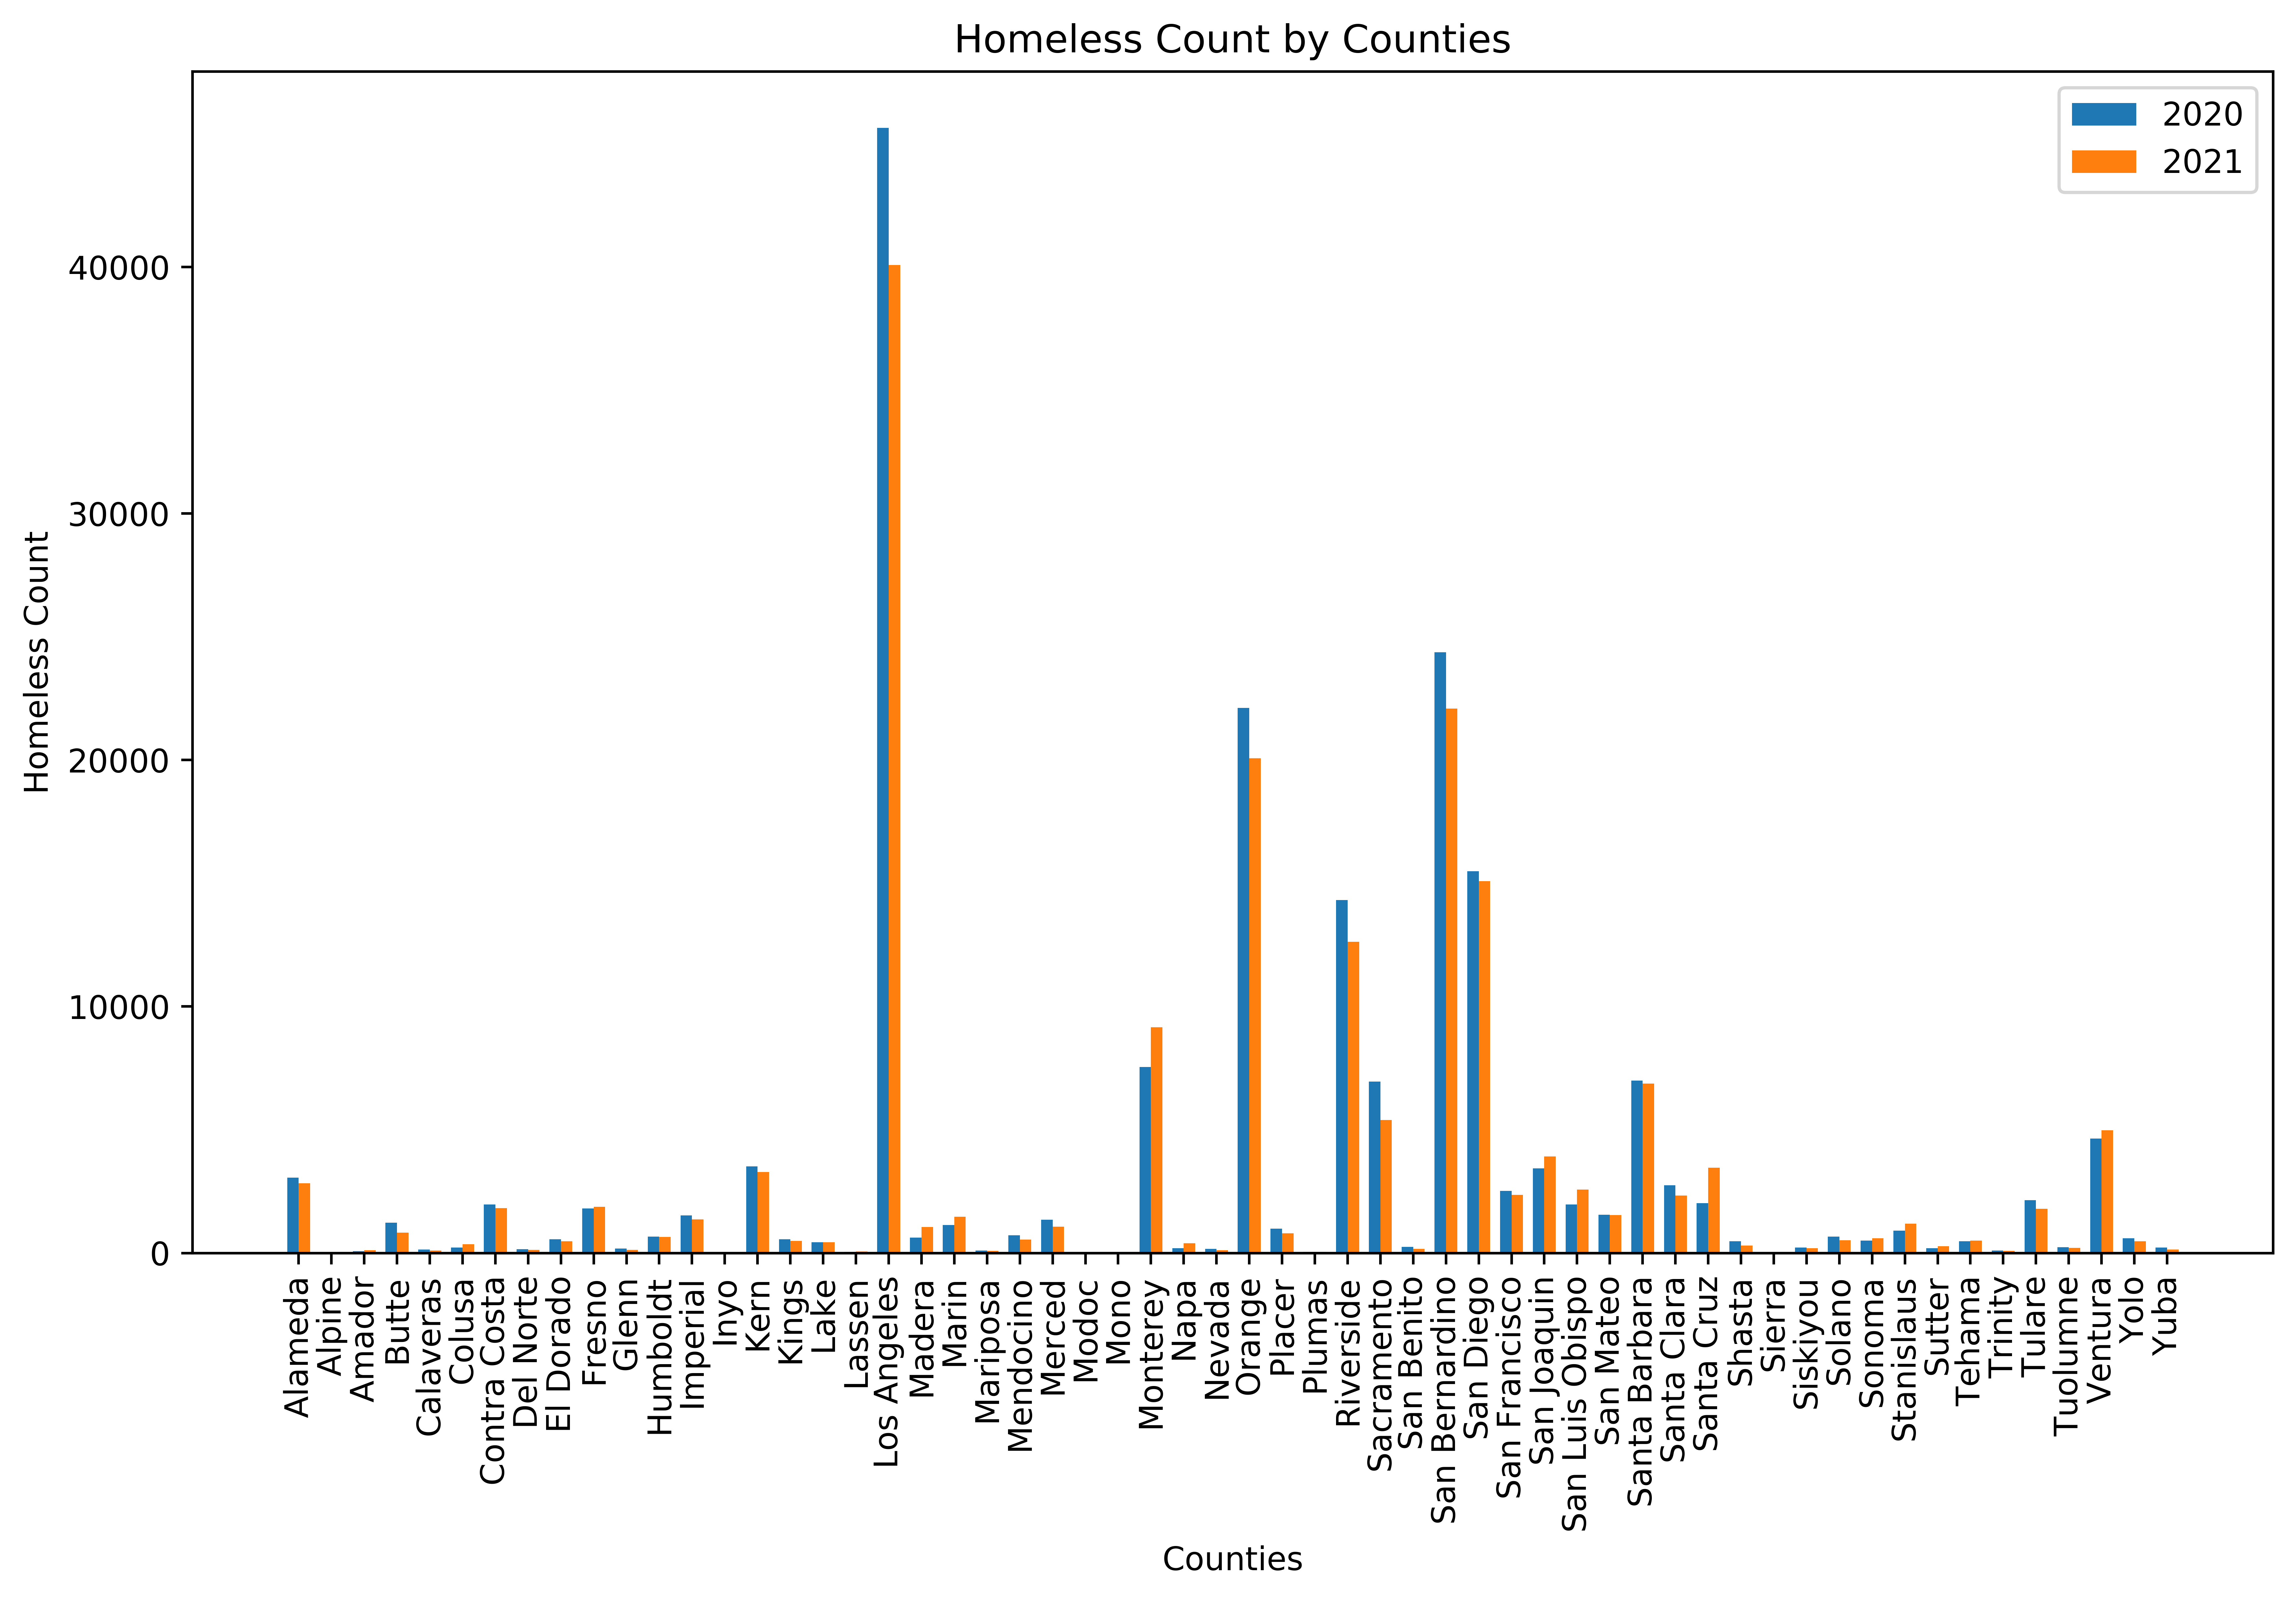

In [43]:
#create a bar graph to vizualize students experiencing homelessness by county
bar_df = combined_data_df.reset_index()
H1 = bar_df['Homeless_2020']
H2 = bar_df['Homeless_2021']
labels = bar_df["CountyName"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7), dpi=700)
bar1 = ax.bar(x - width/2, H1, width, label='2020')
bar2 = ax.bar(x + width/2, H2, width, label='2021')

ax.set_ylabel('Homeless Count')
ax.set_xlabel('Counties')
ax.set_title('Homeless Count by Counties')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.legend()

fig.tight_layout()

plt.show()


#####  The average percentage change in enrollment among students experiencing homelessness was a -0.022% decrease between 2019-200 to 2020-2021 school years. When look at the Homeless Count by County Bar Graph, it is notable that the top 5 highest enrollment counties (Los Angeles, Orange County, Riverside County, San Diego County, and San Bernandino County) all experienced notable population decreases of students experiencing homelessness. This could be a sign of COVID compounding on other financial impacts for the poorest students.